# 01 — Data Quality & EDA

customers (2000, 6) customer_id    0.0
signup_date    0.0
channel        0.0
region         0.0
age            0.0
dtype: float64
orders (15000, 5) order_id       0.0
customer_id    0.0
order_date     0.0
status         0.0
revenue        0.0
dtype: float64
order_items (37443, 4) order_id      0.0
product_id    0.0
qty           0.0
price         0.0
dtype: float64
products (400, 4) product_id     0.0
category       0.0
subcategory    0.0
brand          0.0
dtype: float64
events (120000, 7) event_id       0.0
customer_id    0.0
event_time     0.0
event_type     0.0
session_id     0.0
dtype: float64
campaigns (20, 6) campaign_id    0.0
name           0.0
channel        0.0
start_date     0.0
end_date       0.0
dtype: float64
campaign_members (15000, 6) converted_order_id    0.985867
clicked_at            0.876667
opened_at             0.649867
campaign_id           0.000000
customer_id           0.000000
dtype: float64


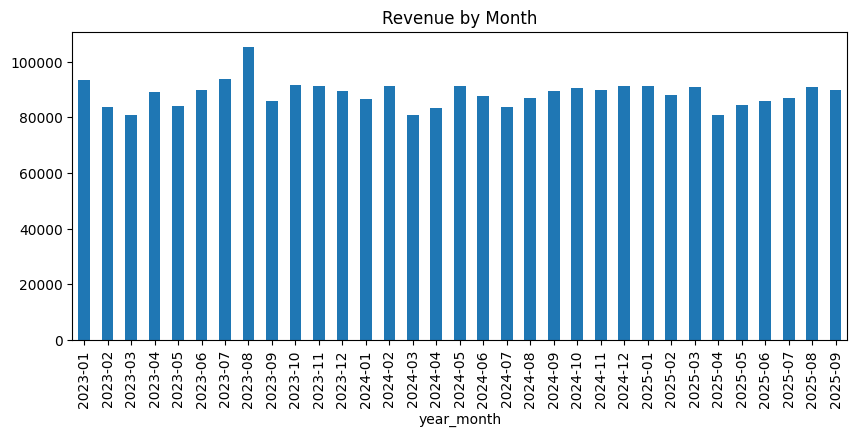

In [ ]:

import pandas as pd, numpy as np, matplotlib.pyplot as plt
from pathlib import Path

RAW = Path("../data/raw")
customers = pd.read_csv(RAW/'customers.csv', parse_dates=['signup_date'])
orders = pd.read_csv(RAW/'orders.csv', parse_dates=['order_date'])
order_items = pd.read_csv(RAW/'order_items.csv')
products = pd.read_csv(RAW/'products.csv')
events = pd.read_csv(RAW/'events.csv', parse_dates=['event_time'])
campaigns = pd.read_csv(RAW/'campaigns.csv', parse_dates=['start_date','end_date'])
members = pd.read_csv(RAW/'campaign_members.csv', parse_dates=['sent_at','opened_at','clicked_at'])

for name, df in [('customers',customers),('orders',orders),('order_items',order_items),('products',products),('events',events),('campaigns',campaigns),('campaign_members',members)]:
    print(name, df.shape, df.isna().mean().sort_values(ascending=False).head(5))

orders['year_month'] = orders['order_date'].dt.to_period('M').astype(str)
orders.groupby('year_month')['revenue'].sum().plot(kind='bar', figsize=(10,4), title='Revenue by Month')
plt.xticks(rotation=90); plt.show()
